In [0]:
# check how many train images we have in each folder
total_train = 0

nvt = len(os.listdir('base_dir/train_dir/nv'))
print(nvt)
melt = len(os.listdir('base_dir/train_dir/mel'))
print(melt)
bklt = len(os.listdir('base_dir/train_dir/bkl'))
print(bklt)
bcct = len(os.listdir('base_dir/train_dir/bcc'))
print(bcct)
akt = len(os.listdir('base_dir/train_dir/ak'))
print(akt)
vasct = len(os.listdir('base_dir/train_dir/vasc'))
print(vasct)
dft = len(os.listdir('base_dir/train_dir/df'))
print(dft)
scct = len(os.listdir('base_dir/train_dir/scc'))
print(scct)

total_train = nvt+melt+bklt+bcct+akt+vasct+dft+scct
print(total_train)

5954
5920
5920
5858
6002
5290
4410
5522
44876


In [0]:
# check how many val images we have in each folder
total_val = 0
nv = len(os.listdir('base_dir/val_dir/nv'))
print(nv)
mel = len(os.listdir('base_dir/val_dir/mel'))
print(mel)
bkl = len(os.listdir('base_dir/val_dir/bkl'))
print(bkl)
bcc = len(os.listdir('base_dir/val_dir/bcc'))
print(bcc)
ak = len(os.listdir('base_dir/val_dir/ak'))
print(ak)
vasc = len(os.listdir('base_dir/val_dir/vasc'))
print(vasc)
df = len(os.listdir('base_dir/val_dir/df'))
print(df)
scc = len(os.listdir('base_dir/val_dir/scc'))
print(scc)

total_val=nv+mel+bkl+bcc+ak+vasc+df+scc
print(total_val)

751
39
75
30
173
11
6
126
1211


### Set Up the Generators

In [0]:
train_path = 'base_dir/train_dir'
valid_path = 'base_dir/val_dir'

num_train_samples = total_train
num_val_samples = total_val
train_batch_size = 16
val_batch_size = 16
image_size = 224

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)


In [0]:

datagen = ImageDataGenerator(
    preprocessing_function= \
    tensorflow.keras.applications.densenet.preprocess_input)

train_batches = datagen.flow_from_directory(train_path,
                                            target_size=(image_size,image_size),
                                            batch_size=train_batch_size)

valid_batches = datagen.flow_from_directory(valid_path,
                                            target_size=(image_size,image_size),
                                            batch_size=val_batch_size)

# Note: shuffle=False causes the test dataset to not be shuffled
test_batches = datagen.flow_from_directory(valid_path,
                                            target_size=(image_size,image_size),
                                            batch_size=1,
                                            shuffle=False)

Found 44876 images belonging to 8 classes.
Found 1211 images belonging to 8 classes.
Found 1211 images belonging to 8 classes.


In [0]:
from numpy.random import seed
seed(101)
from tensorflow import set_random_seed
set_random_seed(101)

import pandas as pd
import numpy as np
#import keras
#from keras import backend as K

import tensorflow
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline


### models definition

In [0]:
from tensorflow.keras import Model, Input
input_shape = (224, 224, 3)
model_input = Input(shape=input_shape)

In [0]:
from tensorflow.keras.models import Sequential

### dense

In [0]:
# create a copy of a mobilenet model

#mobile = tensorflow.keras.applications.densenet.DenseNet201(input_shape=(224, 224, 3), input_tensor=model_input, include_top=False, weights="imagenet")
mobile = tensorflow.keras.applications.densenet.DenseNet201(weights='imagenet', include_top=False, input_tensor=model_input)
#get the last layer shape
last_layer = mobile.get_layer('relu')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

# CREATE THE MODEL ARCHITECTURE

# Exclude the last 5 layers of the above model.
# This will include all layers up to and including global_average_pooling2d_1
#x = mobile.layers[-6].output
x = layers.GlobalMaxPooling2D()(last_output)
#x = layers.Dense(512)(x)
# Create a new dense layer for predictions
# 7 corresponds to the number of classes
x = Dropout(0.25)(x)
predictions = Dense(8, activation='softmax')(x)

# inputs=mobile.input selects the input layer, outputs=predictions refers to the
# dense layer we created above.

model_dense = Model(inputs=mobile.input, outputs=predictions)



W0704 16:20:20.891807 140623554180992 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


last layer output shape: (None, 7, 7, 1920)


In [0]:
model_dense1 = Model(inputs=mobile.input, outputs=predictions, name="dense_model1")
# model_dense2 = Model(inputs=mobile.input, outputs=predictions, name="dense_model2")
# model_dense3 = Model(inputs=mobile.input, outputs=predictions, name="dense_model3")
# model_dense4 = Model(inputs=mobile.input, outputs=predictions, name="dense_model4")
# model_dense5 = Model(inputs=mobile.input, outputs=predictions, name="dense_model5")
# model_dense6 = Model(inputs=mobile.input, outputs=predictions, name="dense_model6")

In [0]:
#model.summary()

### Inception

In [0]:
# create a copy of a mobilenet model
mobile=Sequential()
#mobile = tensorflow.keras.applications.densenet.DenseNet201(input_shape=(224, 224, 3), input_tensor=model_input, include_top=False, weights="imagenet")
mobile = tensorflow.keras.applications.inception_v3.InceptionV3(weights='imagenet', include_top=False, input_tensor=model_input)
#get the last layer shape
last_layer = mobile.get_layer('mixed10')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

# CREATE THE MODEL ARCHITECTURE

# Exclude the last 5 layers of the above model.
# This will include all layers up to and including global_average_pooling2d_1
#x = mobile.layers[-6].output
x = layers.GlobalMaxPooling2D()(last_output)
#x = layers.Dense(512)(x)
# Create a new dense layer for predictions
# 7 corresponds to the number of classes
x = Dropout(0.25)(x)
predictions = Dense(8, activation='softmax')(x)

# inputs=mobile.input selects the input layer, outputs=predictions refers to the
# dense layer we created above.

model_inception = Model(inputs=mobile.input, outputs=predictions , name="my_model")



87916544/87910968 [==============================] - 1s 0us/step
last layer output shape: (None, 5, 5, 2048)


In [0]:
model_inception1 = Model(inputs=mobile.input, outputs=predictions , name="inception_model1")
# model_inception2 = Model(inputs=mobile.input, outputs=predictions , name="my_model2")


### Inception_resnet


In [0]:
# create a copy of a mobilenet model
mobile=Sequential()
#mobile = tensorflow.keras.applications.densenet.DenseNet201(input_shape=(224, 224, 3), input_tensor=model_input, include_top=False, weights="imagenet")
mobile = tensorflow.keras.applications.inception_resnet_v2.InceptionResNetV2(weights='imagenet', include_top=False, input_tensor=model_input)
#get the last layer shape
last_layer = mobile.get_layer('conv_7b_ac')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

# CREATE THE MODEL ARCHITECTURE

# Exclude the last 5 layers of the above model.
# This will include all layers up to and including global_average_pooling2d_1
#x = mobile.layers[-6].output
x = layers.GlobalMaxPooling2D()(last_output)
#x = layers.Dense(512)(x)
# Create a new dense layer for predictions
# 7 corresponds to the number of classes
x = Dropout(0.25)(x)
predictions = Dense(8, activation='softmax')(x)

# inputs=mobile.input selects the input layer, outputs=predictions refers to the
# dense layer we created above.

model_inception_res = Model(inputs=mobile.input, outputs=predictions , name="my_model")



last layer output shape: (None, 5, 5, 1536)


In [0]:
model_inception_res1 = Model(inputs=mobile.input, outputs=predictions , name="inc_res_model1")
# model_inception_res2 = Model(inputs=mobile.input, outputs=predictions , name="my_model2")


### other def

In [0]:
import tensorflow as tf
def median_weight_class_loss(y_true, y_pred):
  epsilon = tf.constant(value=1e-10)
  #weight_sample = np.array([1113,6705,514,327,1099,115,142])/10015
  weight_sample = np.array([867,514,1099,115,800,6705,628,142])/10015
 #weight_sample = np.array( ak ,bcc,bkl ,df ,mel, nv ,scc,vasc)/full
#mel = 1113 -> 900
  weight_sample = 0.05132302/weight_sample
  xent = -tf.reduce_sum(y_true * tf.log(y_pred + epsilon) * weight_sample, axis=1)
  return xent
  #['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC']
  
#327,514,1099,115,1113,6705,142
#{'ak': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}


# 867   ak
# 514   bcc
# 1099  bkl
# 115   df
# 1113  mel
# 6705  nv
# 628   scc
# 142   vasc

In [0]:
!rm -r sample_data

### download the models


In [0]:
!rm -r models

In [0]:
os.mkdir('models')

In [0]:
# !cp 'drive/My Drive/full.h5' -d models/full.h5
# !cp 'drive/My Drive/full_inception.h5' -d models/full_inception.h5
!cp 'drive/My Drive/full_inc_res.h5' -d models/full_inc_res.h5
# !cp 'drive/My Drive/mel_nv.h5' -d models/mel_nv.h5
# !cp 'drive/My Drive/bkl_bcc.h5' -d models/bkl_bcc.h5
# !cp 'drive/My Drive/scc_ak.h5' -d models/scc_ak.h5
# !cp 'drive/My Drive/vasc_df.h5' -d models/vasc_df.h5

### ensemble


In [0]:
model1 = model_dense1
model2 = model_inception1
model3 = model_inception_res1

# model3 = model_dense3
# model4 = model_dense4
# model5 = model_dense5
# new_model = model_dense6

In [85]:
len(model_inception_res1.layers)

783

In [0]:
model1.load_weights('models/full.h5')
model2.load_weights('models/full_inception.h5')
model3.load_weights('models/full_inc_res.h5')
# model2.load_weights('models/mel_nv.h5')
# model3.load_weights('models/bkl_bcc.h5')
# model4.load_weights('models/scc_ak.h5')
# model5.load_weights('models/vasc_df.h5')

In [0]:
models  = []

In [0]:
#models = [model2,model3,model4,model5]
models = [model1,model2,model3]

### ensembling

In [0]:
# def ensemble(models, model_input):
#     outputs = [model.outputs[0] for model in models]
    
#     y = layers.Average()(outputs)
#     #y = layers.Maximum()(outputs)
    
#     modele = Model(inputs=model_input, outputs = y, name='ensemble')
#     return modele

In [0]:
def ensemble(models, model_input):  
  # collect outputs of models in a list
    yModels=[model(model_input) for model in models] 
    # averaging outputs
    yAvg=layers.average(yModels) 
    # build model from same input and avg output
    modelEns = Model(inputs=model_input, outputs=yAvg,    name='ensemble')  
   
    return modelEns

In [0]:

new_model = ensemble(models, model_input)
#model.summary()

In [0]:
# modelEns.save('ens_model.h5')

In [0]:
# modelEns=load_model(ens_model)

## Evaluate the model using the val set

In [0]:
#new_model = model2

In [0]:
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)
#modelEns.compile(loss= categorical_crossentropy,
new_model.compile(loss= median_weight_class_loss,
              optimizer=optimizer,
              metrics=['categorical_accuracy'])



In [149]:
# Get the labels that are associated with each index
print(valid_batches.class_indices)

{'ak': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'scc': 6, 'vasc': 7}


In [150]:
# get the metric names so we can use evaulate_generator
new_model.metrics_names

['loss', 'categorical_accuracy']

In [151]:
# Here the the last epoch will be used.

val_loss, val_cat_acc = \
new_model.evaluate_generator(test_batches, 
                        steps=total_val)

print('val_loss:', val_loss)
print('val_cat_acc:', val_cat_acc)


val_loss: 0.2932202963944655
val_cat_acc: 0.84640795


In [0]:
# Here the best epoch will be used.

# modelEns.load_weights('model.h5')

# val_loss, val_cat_acc = \
# model.evaluate_generator(test_batches, 
#                         steps=total_val)

# print('val_loss:', val_loss)
# print('val_cat_acc:', val_cat_acc)


### Create a Confusion Matrix

In [0]:
# Get the labels of the test images.

test_labels = test_batches.classes

In [153]:
# We need these to plot the confusion matrix.
test_labels

array([0, 0, 0, ..., 7, 7, 7], dtype=int32)

In [154]:
# Print the label associated with each class
test_batches.class_indices

{'ak': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'scc': 6, 'vasc': 7}

In [155]:
# make a prediction
#predictions = model.predict_generator(test_batches, steps=len(df_val), verbose=1)
predictions = new_model.predict_generator(test_batches, steps=total_val, verbose=1)

1211/1211 [==============================] - 125s 104ms/step


In [156]:
predictions.shape

(1211, 8)

In [0]:
# Source: Scikit Learn website
# http://scikit-learn.org/stable/auto_examples/
# model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-
# selection-plot-confusion-matrix-py


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()




In [158]:
test_labels.shape

(1211,)

In [0]:
# argmax returns the index of the max value in a row
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [160]:
test_batches.class_indices

{'ak': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'scc': 6, 'vasc': 7}

Confusion matrix, without normalization
[[103   1  10   5   7   5  42   0]
 [  0  28   1   1   0   0   0   0]
 [  0   0  39   4  14  17   1   0]
 [  0   0   1   3   0   2   0   0]
 [  0   2   1   0  26   9   1   0]
 [  0   6   4   2  17 721   1   0]
 [  9   3   5   4   4   7  94   0]
 [  0   0   0   0   0   0   0  11]]


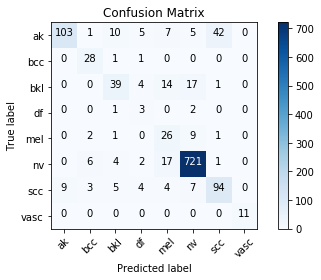

In [161]:
# Define the labels of the class indices. These need to match the 
# order shown above.
cm_plot_labels = ['ak', 'bcc', 'bkl', 'df', 'mel','nv','scc', 'vasc']

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

### Generate the Classification Report

In [162]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_true, y_pred, target_names=cm_plot_labels)

print(report)

              precision    recall  f1-score   support

          ak       0.92      0.60      0.72       173
         bcc       0.70      0.93      0.80        30
         bkl       0.64      0.52      0.57        75
          df       0.16      0.50      0.24         6
         mel       0.38      0.67      0.49        39
          nv       0.95      0.96      0.95       751
         scc       0.68      0.75      0.71       126
        vasc       1.00      1.00      1.00        11

    accuracy                           0.85      1211
   macro avg       0.68      0.74      0.69      1211
weighted avg       0.87      0.85      0.85      1211



In [0]:
# Get the index of the class with the highest probability score
y_pred = np.argmax(predictions, axis=1)

# Get the labels of the test images.
y_true = test_batches.classes

**Recall** = Given a class, will the classifier be able to detect it?<br>
**Precision** = Given a class prediction from a classifier, how likely is it to be correct?<br>
**F1 Score** = The harmonic mean of the recall and precision. Essentially, it punishes extreme values.

In [0]:
# End of Model Building
### ===================================================================================== ###
# Convert the Model from Keras to Tensorflow.js

### test

In [0]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 2 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="red" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

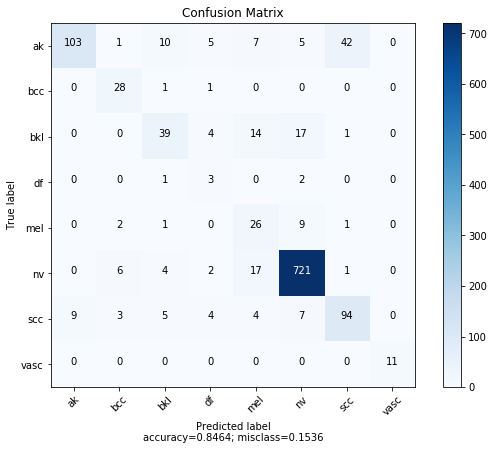

In [166]:
plot_confusion_matrix(cm           = cm ,
                      normalize    = False,
                      target_names = ['ak', 'bcc', 'bkl', 'df', 'mel', 'nv', 'scc', 'vasc'],
                      title        = "Confusion Matrix")

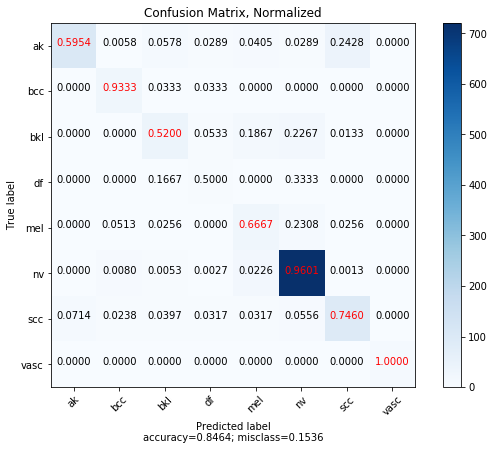

In [167]:
plot_confusion_matrix(cm           = cm, 
                      normalize    = True,
                      target_names = ['ak', 'bcc', 'bkl', 'df', 'mel', 'nv', 'scc', 'vasc'],
                      title        = "Confusion Matrix, Normalized")